In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, classification_report

In [19]:
data = pd.read_csv("../data/OnlineRetail.csv", encoding="latin1",nrows=10000)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [20]:
data.isna().sum()

InvoiceNo         0
StockCode         0
Description      42
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     2291
Country           0
dtype: int64

In [21]:
data['Description'].fillna('Unknown', inplace=True)
data['CustomerID'].fillna(0, inplace=True)
print(data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [22]:
data.size

80000

In [23]:
data.shape

(10000, 8)

In [24]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [25]:
label_encoder = LabelEncoder()

# Encode 'Country', 'InvoiceNo', 'StockCode', and 'Description' (if needed)
data['Country'] = label_encoder.fit_transform(data['Country'])
data['InvoiceNo'] = label_encoder.fit_transform(data['InvoiceNo'])
data['StockCode'] = label_encoder.fit_transform(data['StockCode'])
data['Description'] = label_encoder.fit_transform(data['Description'])

In [26]:
X = data[['Quantity', 'UnitPrice', 'CustomerID', 'Country', 'InvoiceNo', 'StockCode', 'Description']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBScan

In [42]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [43]:
Y = labels  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [29]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=0.3),
}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the model
    y_pred = clf.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')


Random Forest Classifier Accuracy: 88.80%
Logistic Regression Accuracy: 66.50%
SVM Accuracy: 67.10%
KNN Accuracy: 86.85%
Naive Bayes Accuracy: 77.20%
Decision Tree Accuracy: 67.20%
AdaBoost Accuracy: 67.10%


In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))  # Create a new figure for the plot
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=40, alpha=0.5)  # Scatter plot with colors based on labels
plt.title('DBSCAN Clustering')  # Set the title of the plot
plt.xlabel('Feature 1')  # Label the x-axis
plt.ylabel('Feature 2')  # Label the y-axis
plt.show()  # Display the plot


# Kmean

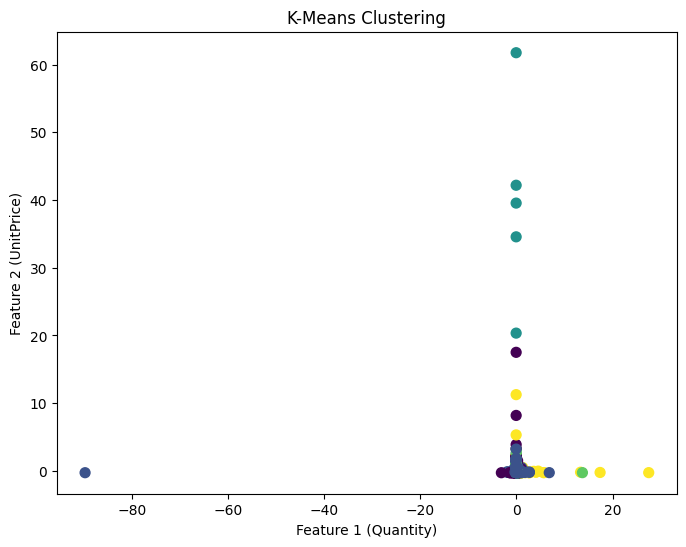

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1 (Quantity)')
plt.ylabel('Feature 2 (UnitPrice)')
plt.show()

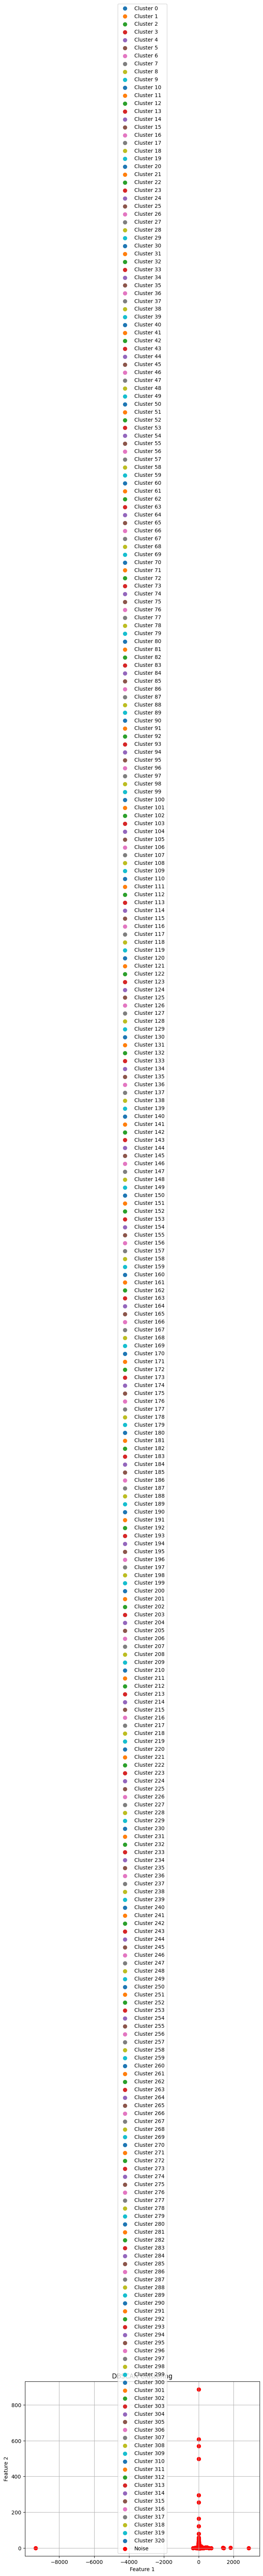

In [47]:
# plot the results
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Plot noise points
        plt.scatter(X.iloc[labels == label, 0], X.iloc[labels == label, 1], s=50, color='red', label='Noise')
    else:
        # Plot clusters
        plt.scatter(X.iloc[labels == label, 0], X.iloc[labels == label, 1], s=50, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


In [31]:
y_kmeans = labels_kmeans
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_kmeans, test_size=0.2, random_state=42)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the model
    y_pred = clf.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

Random Forest Classifier Accuracy: 99.45%
Logistic Regression Accuracy: 99.85%
SVM Accuracy: 99.95%
KNN Accuracy: 98.95%
Naive Bayes Accuracy: 94.95%
Decision Tree Accuracy: 98.70%
AdaBoost Accuracy: 94.80%


# Heirarichial

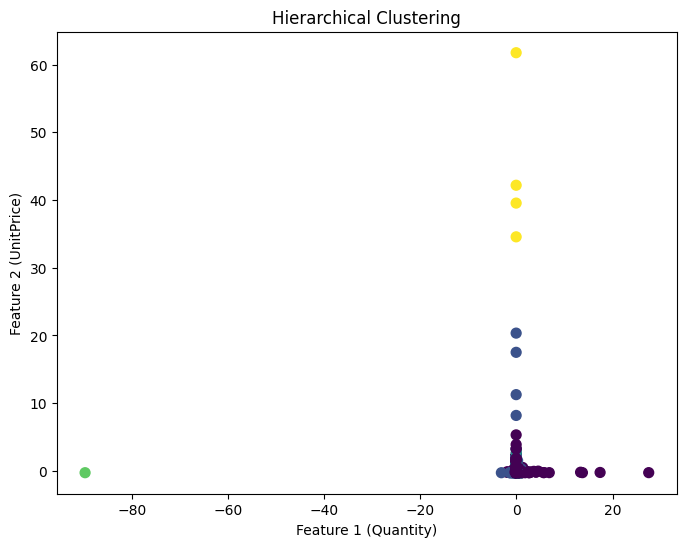

In [32]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=5)
labels_hierarchical = hierarchical.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_hierarchical, cmap='viridis', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1 (Quantity)')
plt.ylabel('Feature 2 (UnitPrice)')
plt.show()

In [33]:
y_hierarchical = labels_hierarchical
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_hierarchical, test_size=0.2, random_state=42)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the model
    y_pred = clf.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

Random Forest Classifier Accuracy: 99.90%
Logistic Regression Accuracy: 99.95%
SVM Accuracy: 99.95%
KNN Accuracy: 100.00%
Naive Bayes Accuracy: 99.50%
Decision Tree Accuracy: 99.90%
AdaBoost Accuracy: 99.90%


In [34]:
# END